## Part 1: Training a convolutional neural network

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

print("-----------")

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)




-----------
Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [60]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


def make_convnet(train_gen,validation_gen):
    num_classes = 2
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                    activation="relu",
                    input_shape=(64,64,3)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes - 1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


    history = model.fit(train_generator,
            batch_size=256,
            epochs=10,
            verbose=1,
            validation_data=validation_generator,
            callbacks=[es]);
    return history


In [61]:
history = make_convnet(train_gen=train_generator, validation_gen=validation_generator)


Epoch 1/10
50/50 [==============================] - 7s 140ms/step - loss: 0.6886 - accuracy: 0.5469 - val_loss: 0.6678 - val_accuracy: 0.6059
Epoch 2/10
50/50 [==============================] - 7s 147ms/step - loss: 0.5840 - accuracy: 0.7163 - val_loss: 0.5503 - val_accuracy: 0.7431
Epoch 3/10
50/50 [==============================] - 9s 182ms/step - loss: 0.5484 - accuracy: 0.7375 - val_loss: 0.5402 - val_accuracy: 0.7361
Epoch 4/10
50/50 [==============================] - 10s 192ms/step - loss: 0.4768 - accuracy: 0.7856 - val_loss: 0.5287 - val_accuracy: 0.7344
Epoch 5/10
50/50 [==============================] - 10s 192ms/step - loss: 0.4818 - accuracy: 0.7850 - val_loss: 0.5166 - val_accuracy: 0.7517
Epoch 6/10
50/50 [==============================] - 10s 199ms/step - loss: 0.4394 - accuracy: 0.8019 - val_loss: 0.5670 - val_accuracy: 0.7413
Epoch 7/10
50/50 [==============================] - 10s 193ms/step - loss: 0.3976 - accuracy: 0.8112 - val_loss: 0.5639 - val_accuracy: 0.7153
Ep

### Plot Accuracy

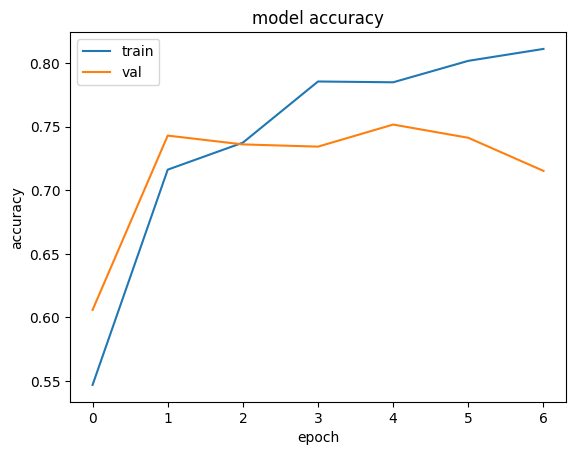

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

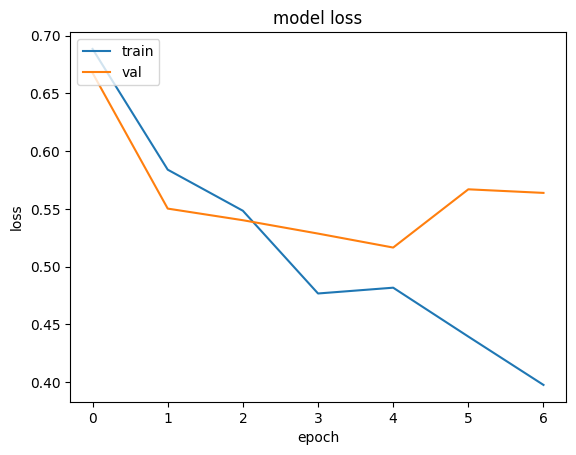

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2: Data Augmentation

In [64]:
data_gen_aug = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,

                                  brightness_range=[0.7,1.3],
                                  zoom_range=[0.8,1.2]
                                  )

train_generator_aug = data_gen_aug.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

history_aug = make_convnet(train_gen=train_generator_aug, validation_gen=validation_generator)


Found 1600 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 10s 199ms/step - loss: 0.7031 - accuracy: 0.5412 - val_loss: 0.6828 - val_accuracy: 0.5017
Epoch 2/10
50/50 [==============================] - 10s 194ms/step - loss: 0.6434 - accuracy: 0.6400 - val_loss: 0.6309 - val_accuracy: 0.6198
Epoch 3/10
50/50 [==============================] - 10s 193ms/step - loss: 0.5793 - accuracy: 0.7163 - val_loss: 0.5476 - val_accuracy: 0.7361
Epoch 4/10
50/50 [==============================] - 10s 192ms/step - loss: 0.5573 - accuracy: 0.7237 - val_loss: 0.5415 - val_accuracy: 0.7448
Epoch 5/10
50/50 [==============================] - 10s 193ms/step - loss: 0.4824 - accuracy: 0.7781 - val_loss: 0.5079 - val_accuracy: 0.7743
Epoch 6/10
50/50 [==============================] - 10s 193ms/step - loss: 0.4499 - accuracy: 0.8006 - val_loss: 0.5001 - val_accuracy: 0.7622
Epoch 7/10
50/50 [==============================] - 10s 193ms/step - loss: 0.4108 - accuracy: 0.8100

### Plot Accuracy

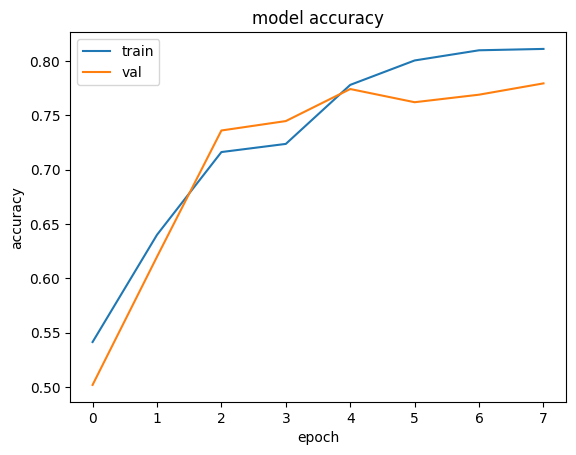

In [65]:
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

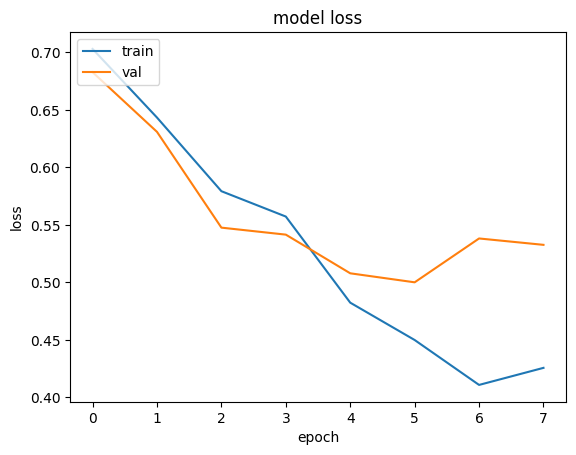

In [66]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Interlude: Applying a pre-trained convolutional neural network

In [67]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

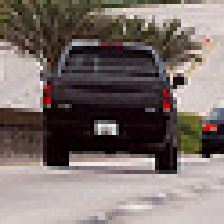

In [68]:
img = load_img("a5_images/train/car/0000.jpg", target_size=(224,224))
img

In [69]:

img = load_img("a5_images/train/car/0000.jpg", target_size=(224,224))
arr = img_to_array(img)
arr = preprocess_input(arr)

arr = arr.reshape(1, 224, 224, 3)

pred = vggmodel.predict(arr)
decode_predictions(pred)

1/1 [==============================] - 0s 201ms/step


[[('n03417042', 'garbage_truck', 0.15934166),
  ('n03345487', 'fire_engine', 0.111557655),
  ('n04252225', 'snowplow', 0.100916766),
  ('n06874185', 'traffic_light', 0.08726416),
  ('n03977966', 'police_van', 0.086844906)]]

## Part 3: Using VGG-16 as an image extractor